<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D1_LC1_Simple_and_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- ds ft -->
<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Linear regression (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____
<center>Constructor Academy, 2024</center>


# Linear regression (Live coding)

__Goal:__ Be comfortable running code, understanding regression models and documenting your results using the Google Colab platform

       
__Topics Trained:__ Train-test split, cross validation, Linear Regression (simple and multiple), Polynomial Regression, Multi-collinearity, Feature Scaling and Selection, Interpretability


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib import style

# suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
style.use('fivethirtyeight')

In [ ]:
sklearn.__version__

'1.2.2'

## Getting Data

<span style="color:orange"> We will use a standard house prices dataset in this session.</span>

In [ ]:
# from sklearn.datasets import load_boston
# data = load_boston()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['PRICE'] = data.target

# boston.csv
gdrive_data_url = "https://drive.google.com/file/d/1cnIxAAqXnG9vHO59EuRBbnit_3rM_UOT/view?usp=share_link"
file_id = gdrive_data_url.split('/')[-2]
data_file='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(data_file)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns = df.columns.str.upper()
df.rename(columns={'BLACK':'B', 'MEDV':'PRICE'}, inplace=True)
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Boston house prices dataset
===========================

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
References
----------

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


<span style="color:orange">We put our data into a pandas dataframe to get a nice idea of what we are working with</span>

In [ ]:
df_simple = df[['RM', 'PRICE']]
df_simple.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [ ]:
df_simple.shape

(506, 2)

## Data visualization

<span style="color:orange">We visualize our data to have a better idea of her</span>

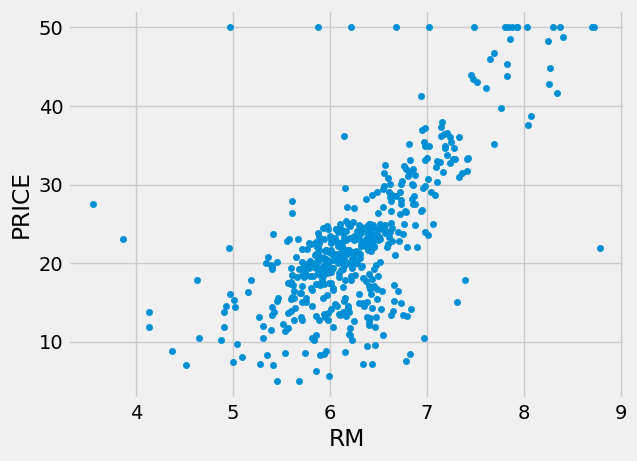

In [ ]:
size = 5
df_simple.plot.scatter(x='RM', y='PRICE');

## Train and test split

<span style="color:orange">Before running our regression model, we first split our data into train and test data. </span> <br>
<span style="color:orange">Do you remember why we do this?</span>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_simple[['RM']], # X
                                                    df_simple['PRICE'], # y
                                                    test_size=0.2, # %age of test split
                                                    random_state=17) # ensure reproducibility

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

In [ ]:
X_train.head()

,RM
418,5.957
204,8.034
304,7.236
478,6.185
232,8.337


In [ ]:
y_train.head()

418     8.8
204    50.0
304    36.1
478    14.6
232    41.7
Name: PRICE, dtype: float64

<span style="color:orange">Using the matplotlib.scatter() function, we can visualize our train and test data.<span>

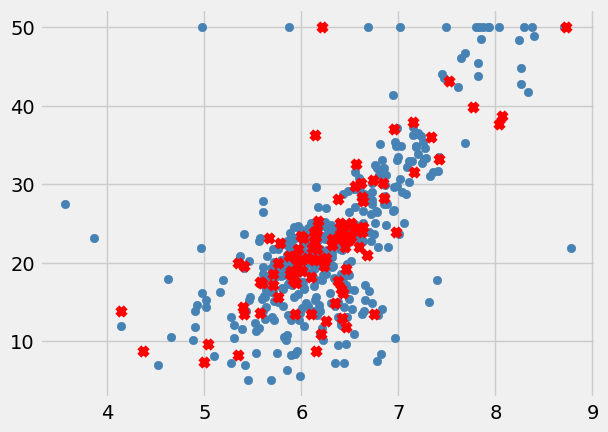

In [ ]:
plt.scatter(X_train, y_train, color = 'steelblue', marker='o')
plt.scatter(X_test, y_test, color = 'red', marker='x');

## Simple Linear Regression

<span style="color:orange"> Using the sklearn library, we import a simple linear regression model, train the model and then predict the labels. <span>

In [ ]:
from sklearn.linear_model import LinearRegression

# instantiating the model
regr = LinearRegression()

# train the model on the training data
regr.fit(X_train, y_train)

# predict on the unseen test data
pred = regr.predict(X_test)

In [ ]:
pred[:5]

array([26.63654061, 24.03094555, 23.32943918, 44.7299385 , 24.55024246])

In [ ]:
y_test[:5]

191    30.5
285    22.0
461    17.7
225    50.0
159    23.3
Name: PRICE, dtype: float64

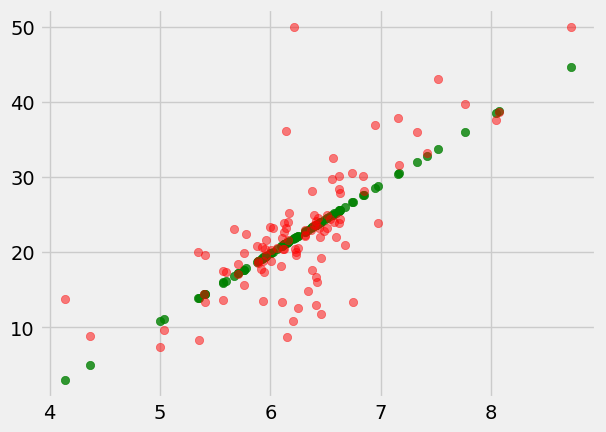

In [ ]:
plt.scatter(X_test, pred, color = 'green', alpha=.8)
plt.scatter(X_test, y_test, color = 'red', alpha=.5);

__Model evaluation__

<span style="color:orange">We use metrics from the sklearn library to evaluate our model.<span> <br>
<span style="color:orange">Do you know which metric we should use for regression models?<span>

In [ ]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', metrics.mean_squared_error(y_test, pred, squared=False))
print('R2 Score', metrics.r2_score(y_test, pred))

MAE 3.5768737579964998
MSE 30.168823173863736
RMSE 5.492615330956987
R2 Score 0.5425677190494489


__Cross-validation__

<span style="color:orange">We can also use cross validation to evaluate our model.<span>

In [ ]:
from sklearn.model_selection import cross_val_score

regr = LinearRegression()

scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
scores

array([0.5276205 , 0.09903535, 0.25248342, 0.63458114, 0.56580636])

In [ ]:
np.mean(scores)

0.41590535299569575

In [ ]:
np.std(scores)

0.2048819238378288

## Linear Regression with Polynomial Features (Polynomial Regression) & Scaling



### 1. Feature Engg with polynomial degree of 3

In [ ]:
X_train.head()

,RM
418,5.957
204,8.034
304,7.236
478,6.185
232,8.337


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 3 Degrees

# initialize
poly_feat3 = PolynomialFeatures(degree=3, include_bias=False).set_output(transform="pandas")

# # fit and transform
X_poly3_train = poly_feat3.fit_transform(X_train)
X_poly3_test = poly_feat3.fit_transform(X_test) # .transform() also will give same results

X_poly3_train.head()

,RM,RM^2,RM^3
418,5.957,35.485849,211.389202
204,8.034,64.545156,518.555783
304,7.236,52.359696,378.874760
478,6.185,38.254225,236.602382
232,8.337,69.505569,579.467929


In [ ]:
X_poly3_test[:5]

,RM,RM^2,RM^3
191,6.739,45.414121,306.045761
285,6.453,41.641209,268.710722
461,6.376,40.653376,259.205925
225,8.725,76.125625,664.196078
159,6.510,42.380100,275.894451


### 2. Apply standard scaling on our features

In [ ]:
X_poly3_train[:5]

,RM,RM^2,RM^3
418,5.957,35.485849,211.389202
204,8.034,64.545156,518.555783
304,7.236,52.359696,378.874760
478,6.185,38.254225,236.602382
232,8.337,69.505569,579.467929


In [ ]:
from sklearn.preprocessing import StandardScaler

# initialize object \ instance of StandardScaler class
ss = StandardScaler().set_output(transform="pandas")

# first do fit -> compute mean and standard dev. for each feature of train data
# i.e., mean_X_poly3_train(Feature) and sigma_X_poly3_train(Feature) for each Feature
# then do transform -> scale each feature i.e:
# X_train_scaled(Feature) = (X_poly3_train(Feature) - mean_X_poly3_train(Feature)) / sigma_X_poly3_train(Feature)
X_train_scaled = ss.fit_transform(X_poly3_train)
# the above is equivalent to the following:
# ss.fit(X_poly3_train)  <-- learn the mean and std dev for each feature
# X_train_scaled = ss.transform(X_poly3_train) <--- use them to scale and transform each feature


# scale test data based on learned parameters from train data (don't FIT here again!)
# X_test_scaled(Feature) = (X_poly3_test(Feature) - mean_X_poly3_train(Feature)) / sigma_X_poly3_train(Feature)
X_test_scaled = ss.transform(X_poly3_test)

___Transform and Fit-Transform will NOT give similar results here because we are scaling features based on learned parameters from the training data___

In [ ]:
ss.fit_transform(X_poly3_train)
ss.transform(X_poly3_test)[:5] # this is CORRECT

,RM,RM^2,RM^3
191,0.631355,0.580910,0.517851
285,0.229725,0.171267,0.111198
461,0.121594,0.064013,0.007672
225,3.420295,3.915411,4.418823
159,0.309770,0.251492,0.189443


In [ ]:
ss.fit_transform(X_poly3_train)
ss.fit_transform(X_poly3_test)[:5] # DON'T do this, this is WRONG

,RM,RM^2,RM^3
191,0.717397,0.673837,0.612642
285,0.283891,0.229358,0.170799
461,0.167179,0.112984,0.058314
225,3.727680,4.291895,4.851191
159,0.370289,0.316406,0.255815


### Train and Evaluate Model Performance

In [ ]:
regr2 = LinearRegression()

regr2.fit(X_train_scaled, y_train)

pred2 = regr2.predict(X_test_scaled)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred2))
print('MSE', metrics.mean_squared_error(y_test, pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 Score', metrics.r2_score(y_test, pred2))

MAE 3.749542287504946
MSE 30.431073865394023
RMSE 5.516436700026025
R2 Score 0.5385913646747285


## Linear Regression with Pipelines

Do refer to [the documentation](https://scikit-learn.org/stable/modules/compose.html#pipeline) for more details

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps = [
                             ("poly_features", PolynomialFeatures(degree=3, include_bias=False).set_output(transform="pandas")),  # (step_name, actual_step_function\class)
                             ("standard_scale", StandardScaler().set_output(transform="pandas")),
                             ("model", LinearRegression())
                            ])


In [ ]:
pipeline

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standard_scale', StandardScaler()),
                ('model', LinearRegression())])

### Access specific steps in the pipeline

In [ ]:
pipeline[0]

PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
pipeline['poly_features']

PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
pipeline['model']

LinearRegression()

### Train and Evaluate Pipeline

In [ ]:
X_train[:5]

,RM
418,5.957
204,8.034
304,7.236
478,6.185
232,8.337


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standard_scale', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
pipeline

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standard_scale', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
X_test[:5]

,RM
191,6.739
285,6.453
461,6.376
225,8.725
159,6.510


In [ ]:
pred3 = pipeline.predict(X_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred3))
print('MSE', metrics.mean_squared_error(y_test, pred3))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('R2 Score', metrics.r2_score(y_test, pred3))

MAE 3.749542287504946
MSE 30.431073865394023
RMSE 5.516436700026025
R2 Score 0.5385913646747285


In [ ]:
# inspect intermediate pipeline outputs
pipeline[:2]

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standard_scale', StandardScaler())])

In [ ]:
# inspect intermediate pipeline outputs
pipeline[:2].transform(X_train).head()

,RM,RM^2,RM^3
418,-0.466808,-0.497051,-0.513148
204,2.449923,2.658062,2.832509
304,1.329292,1.335026,1.311104
478,-0.146628,-0.196475,-0.238526
232,2.875426,3.196639,3.495964


## Multiple Linear Regression

We will now build a linear regression model with more than 1 feature (X) to predict the house price (y)

### Load the dataset

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['PRICE']),
                                                    df['PRICE'],
                                                    test_size=0.2,
                                                    random_state=17)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0,0.6790,5.957,100.0,1.8026,24,666,20.2,16.45,20.62
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88
304,0.05515,33.0,2.18,0,0.4720,7.236,41.1,4.0220,7,222,18.4,393.68,6.93
478,10.23300,0.0,18.10,0,0.6140,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47


In [ ]:
y_train.head()

418     8.8
204    50.0
304    36.1
478    14.6
232    41.7
Name: PRICE, dtype: float64

### Train and Evaluate Model Performance for Multiple Regression

In [ ]:
pipeline2 = Pipeline(steps = [("standard_scale", StandardScaler().set_output(transform="pandas")),
                              ("modeling", LinearRegression())])

pipeline2

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
scores = cross_val_score(pipeline2, X_train, y_train, cv=5, scoring='r2')
scores

array([0.73118832, 0.50454008, 0.69102965, 0.77909582, 0.79846954])

In [ ]:
pipeline2.fit(X_train, y_train)

pred4 = pipeline2.predict(X_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred4))
print('MSE', metrics.mean_squared_error(y_test, pred4))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('R2 Score', metrics.r2_score(y_test, pred4))

MAE 3.0093478774479934
MSE 19.8135168403005
RMSE 4.451237675107958
R2 Score 0.6995791930736399


## Inspecting Pipeline Steps

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0,0.6790,5.957,100.0,1.8026,24,666,20.2,16.45,20.62
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88
304,0.05515,33.0,2.18,0,0.4720,7.236,41.1,4.0220,7,222,18.4,393.68,6.93
478,10.23300,0.0,18.10,0,0.6140,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47


In [ ]:
pipeline2

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
pipeline2[0]

StandardScaler()

In [ ]:
dir(pipeline2[0])

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_sklearn_auto_wrap_output_keys',
 '_sklearn_output_config',
 '_validate_data',
 '_validate_params',
 'copy',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_output',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

In [ ]:
pipeline2[0].mean_

array([3.83187354e+00, 1.07648515e+01, 1.14613366e+01, 7.42574257e-02,
       5.58056436e-01, 6.28941337e+00, 6.91299505e+01, 3.69627772e+00,
       9.76237624e+00, 4.14059406e+02, 1.84532178e+01, 3.56108886e+02,
       1.27962129e+01])

In [ ]:
pipeline2[0].var_

array([8.30193849e+01, 5.37526388e+02, 4.72887858e+01, 6.87432605e-02,
       1.30194916e-02, 5.07084173e-01, 7.73929029e+02, 4.15786385e+00,
       7.67455151e+01, 2.86813183e+04, 4.82060846e+00, 8.18845368e+03,
       5.14857062e+01])

In [ ]:
X_train['CRIM'].describe()

count    404.000000
mean       3.831874
std        9.122795
min        0.006320
25%        0.083827
50%        0.274475
75%        3.911625
max       88.976200
Name: CRIM, dtype: float64

In [ ]:
scaled_df = pipeline2[0].transform(X_train)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,7.649920,-0.464310,0.965387,-0.283221,1.059951,-0.466808,1.109652,-0.928690,1.625216,1.487643,0.795587,-3.753549,1.090369
204,-0.418349,3.633235,-1.276972,-0.283221,-1.244108,2.449923,-1.338264,0.697236,-0.657772,-1.122251,-1.709436,0.380607,-1.381982
304,-0.414501,0.959048,-1.349682,-0.283221,-0.754200,1.329292,-1.007562,0.159740,-0.315323,-1.134060,-0.024239,0.415196,-0.817550
478,0.702533,-0.464310,0.965387,-0.283221,0.490290,-0.146628,0.991030,-0.748266,1.625216,1.487643,0.795587,0.260704,0.729412
232,-0.357415,-0.464310,-0.765098,-0.283221,-0.447459,2.875426,0.149896,0.069699,-0.201174,-0.632157,-0.479697,0.329330,-1.439122


In [ ]:
scaled_df['CRIM'].describe()

count    4.040000e+02
mean    -6.595384e-17
std      1.001240e+00
min     -4.198600e-01
25%     -4.113535e-01
50%     -3.904296e-01
75%      8.752838e-03
max      9.344713e+00
Name: CRIM, dtype: float64

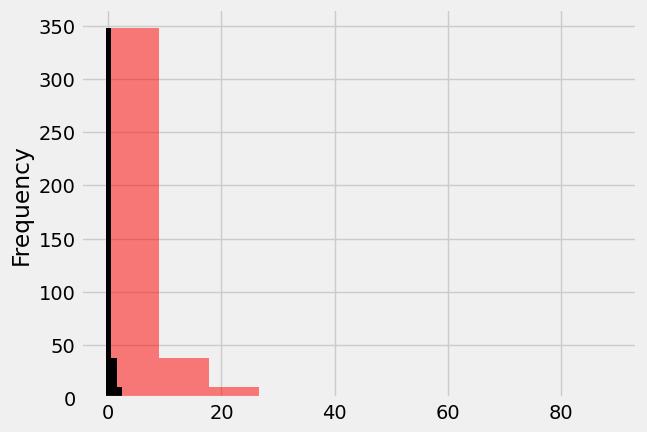

In [ ]:
X_train['CRIM'].plot(kind='hist', alpha=0.5, color='red');
scaled_df['CRIM'].plot(kind='hist', color='black');

## Effects of Multicollinearity on Linear Regression

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

For example, height and weight, fixed acidity and volatile acidity etc.

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable

Consider the basic linear regression model:

$$Y = W0 + W1*X1 + W2*X2$$

Coefficient W1 is the increase in Y for a unit increase in X1 __while keeping X2 constant.__

But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

_“ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”_

Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model which can be a problem in interpretability.

__Be very careful with handling multicollinearity and only drop features if you are absolutely sure it may not be important.__

We will now use correlations to remove highly correlated features from our data before training the model.

### Computing Feature Correlations

In [ ]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.191094,0.387283,-0.061758,0.403585,-0.200970,0.354149,-0.374757,0.611216,0.565849,0.284911,-0.369859,0.440920
ZN,-0.191094,1.000000,-0.534278,-0.029703,-0.510592,0.371164,-0.574982,0.644491,-0.298482,-0.329170,-0.396009,0.172950,-0.432818
INDUS,0.387283,-0.534278,1.000000,0.054777,0.757879,-0.399652,0.670818,-0.724577,0.576566,0.717634,0.363092,-0.342228,0.610225
CHAS,-0.061758,-0.029703,0.054777,1.000000,0.076716,0.139809,0.068686,-0.091363,-0.011715,-0.043413,-0.132850,0.041297,-0.114370
NOX,0.403585,-0.510592,0.757879,0.076716,1.000000,-0.324919,0.741742,-0.774301,0.596362,0.663097,0.183405,-0.374589,0.611067
RM,-0.200970,0.371164,-0.399652,0.139809,-0.324919,1.000000,-0.292016,0.257437,-0.206997,-0.291773,-0.371130,0.153252,-0.597194
AGE,0.354149,-0.574982,0.670818,0.068686,0.741742,-0.292016,1.000000,-0.747020,0.460340,0.531382,0.268139,-0.282854,0.627272
DIS,-0.374757,0.644491,-0.724577,-0.091363,-0.774301,0.257437,-0.747020,1.000000,-0.489385,-0.558018,-0.231657,0.294837,-0.520455
RAD,0.611216,-0.298482,0.576566,-0.011715,0.596362,-0.206997,0.460340,-0.489385,1.000000,0.905905,0.471209,-0.419047,0.480836
TAX,0.565849,-0.329170,0.717634,-0.043413,0.663097,-0.291773,0.531382,-0.558018,0.905905,1.000000,0.462861,-0.418417,0.543939


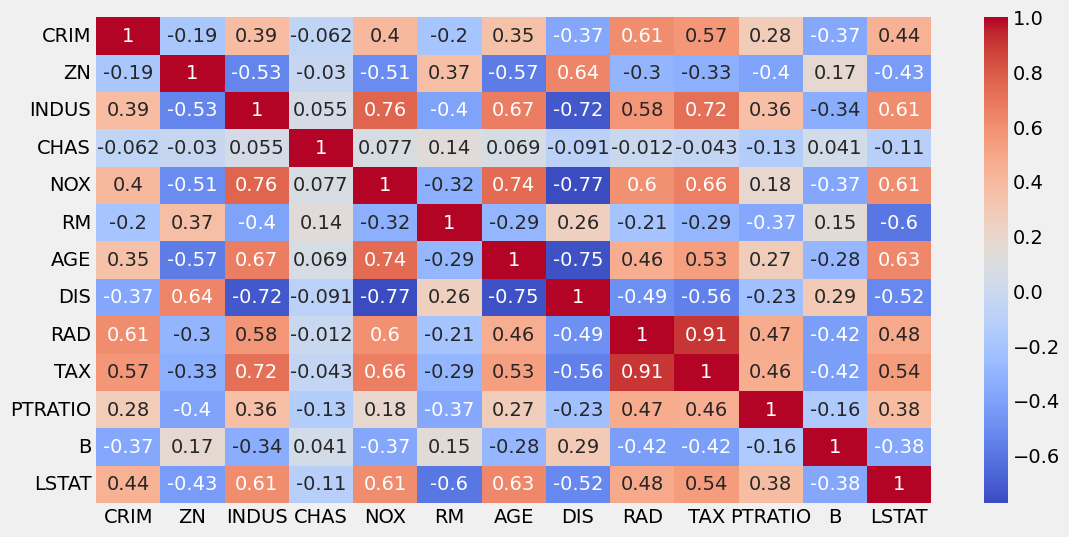

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm');

### Visualizing strong feature correlations > 0.75

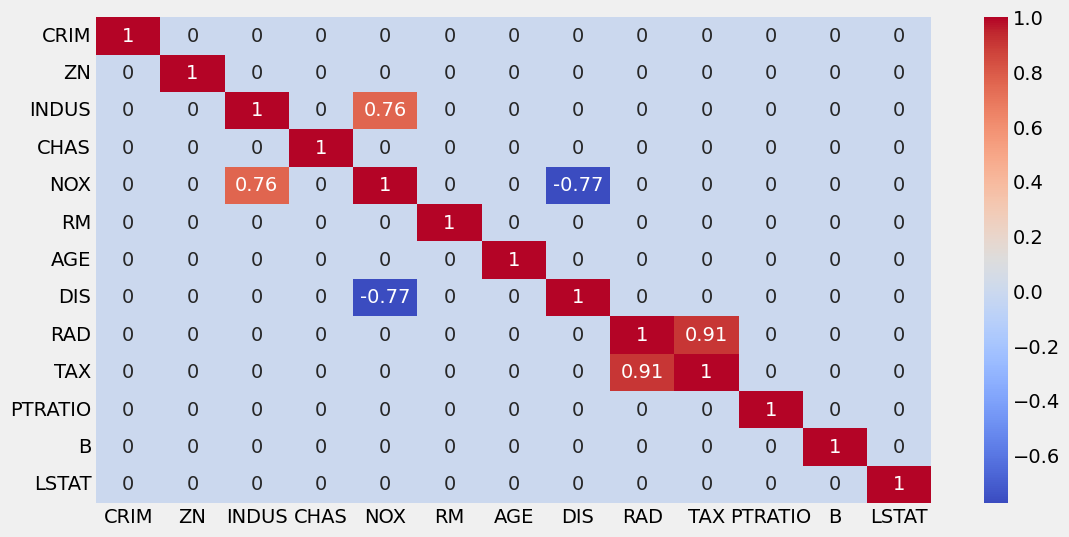

In [ ]:
r = X_train.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(12, 6))
sns.heatmap(r, annot=True, cmap='coolwarm');

### Feature Selection based on Strong Correlations

In [ ]:
features_to_drop = ['NOX', 'RAD']

X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

In [ ]:
X_train_reduced.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0,5.957,100.0,1.8026,666,20.2,16.45,20.62
204,0.02009,95.0,2.68,0,8.034,31.9,5.1180,224,14.7,390.55,2.88
304,0.05515,33.0,2.18,0,7.236,41.1,4.0220,222,18.4,393.68,6.93
478,10.23300,0.0,18.10,0,6.185,96.7,2.1705,666,20.2,379.70,18.03
232,0.57529,0.0,6.20,0,8.337,73.3,3.8384,307,17.4,385.91,2.47


### Train and Evaluate Model Performance for Multiple Regression

In [ ]:
pipeline3 = Pipeline(steps = [("standard_scale", StandardScaler().set_output(transform="pandas")),
                              ("modeling", LinearRegression())])

pipeline3

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
scores = cross_val_score(pipeline3, X_train_reduced, y_train, cv=5, scoring='r2')
scores

array([0.68916705, 0.44036822, 0.69388082, 0.78517171, 0.79104353])

In [ ]:
pipeline3.fit(X_train_reduced, y_train)

pred5 = pipeline3.predict(X_test_reduced)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred5))
print('MSE', metrics.mean_squared_error(y_test, pred5))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred5)))
print('R2 Score', metrics.r2_score(y_test, pred5))

MAE 3.0783364380004654
MSE 21.420022783344812
RMSE 4.628177047536623
R2 Score 0.6752206798610989


### Basic Model Interpretation

In [ ]:
pipeline3

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
model = pipeline3['modeling']
model

LinearRegression()

In [ ]:
model.coef_

array([-0.56113897,  1.21989373, -0.42043713,  0.80046705,  2.85671057,
       -0.47918661, -2.39794141, -0.38470111, -1.52195597,  0.66083044,
       -4.16008103])

In [ ]:
pipeline3[0].get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [ ]:
pd.DataFrame({
    'Feature': pipeline3[0].get_feature_names_out(),
    'Coef': model.coef_
}).sort_values(by=['Coef'], ascending=False)

,Feature,Coef
4,RM,2.856711
1,ZN,1.219894
3,CHAS,0.800467
9,B,0.660830
7,TAX,-0.384701
2,INDUS,-0.420437
5,AGE,-0.479187
0,CRIM,-0.561139
8,PTRATIO,-1.521956
6,DIS,-2.397941


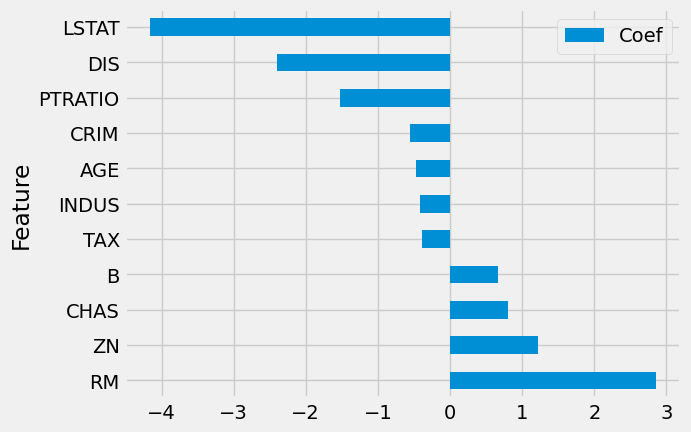

In [ ]:
(pd.DataFrame({
    'Feature': pipeline3[0].get_feature_names_out(),
    'Coef': model.coef_
}).sort_values(by=['Coef'], ascending=False)
  .set_index('Feature')
  .plot(kind='barh'));

Most important features affecting model predictions:

- RM:       average number of rooms per dwelling
- LSTAT:    % lower status of the population
- DIS:      weighted distances to five Boston employment centres
- PTRATIO:  pupil-teacher ratio in schools

        

## Closing Notes

If using linear regression as the final model with a focus on interpretation of predictions for the business, do focus on trying to satisfy most of the following:

### The Four Assumptions of Linear Regression

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.


More details [here](https://www.statology.org/linear-regression-assumptions/)

#### Asking for help from ChatGPT? Remember to verify its responses. [Check example here](https://chat.openai.com/share/1c12f8f8-b31a-4805-92d7-e903db9dbfcf)